# k-최근접 이웃 회귀

지도학습 알고리즘은 크게 분류 vs 회귀로 나뉘고,

분류는 2장에서 다룬대로 샘플을 몇개의 클래스 중 하나로 분류.

회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제.

- 회귀는 정해진 클래스가 없고, 임의의 수치를 출력.
    
  두 변수 사이에 상관관계를 분석하는 방법 = 회귀.
    
    
  앞서 k-최근접 이웃 분류 알고리즘은 예측하려는 샘플 k개를 선택해서, 그 다음 이 샘플들의 클래스를 확인하여
        다수 클래스를 새로운 샘플(x)의 클래스로 예측.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import numpy as np

In [4]:
# 농어의 길이, 무게 - 여기서는 (리스트->넘파이로 변환X) 바로 넘파이 배열로 만듦.
    # 근데 1차원 배열임.
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [10]:
perch_length.shape

(56,)

In [5]:
import matplotlib.pyplot as plt

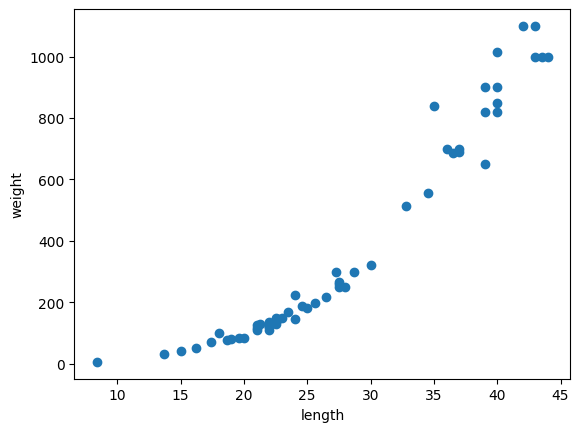

In [6]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
# 사이킷런에서 사용할 훈련 세트는 2차원 배열이여야 한다.

In [9]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [25]:
print(train_input.shape, test_input.shape)
print(train_input)
print("\n",test_input)

(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]

 [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [8]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [9]:
# 2장에서는 2개의 특성을 사용했기에 자연스레 열2개인 2차원이었음.
# 이번 예제는 특성이 1개라 수동으로 1개 열인 2차원으로 만들어줘야 함.
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [10]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

In [13]:
train_input = train_input.reshape(-1, 1) # reshape(-1,x) 하면 x대로 알아서 맞춰줌.
test_input = test_input.reshape(-1, 1)

In [14]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knr = KNeighborsRegressor() # Resgressor가 회귀
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [17]:
knr.score(test_input, test_target) # 회귀에서는정확한 숫자를 맞춘다는 건 거의 불가능.
# 회귀의 경우에는 조금 다른 값으로 평가하는데 이 점수를 결정계수라고 하고, R**2라고도 부른다.
# 결론적으로, 예측이 타깃에 아주 가까워지면 1에 가까워진다.

0.992809406101064

In [18]:
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차를 평균하여 반환. 
# 이건 위 결정계수가 얼마나 좋은지 비교하기 위함.

In [17]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 19g정도 타깃값과 다르다.

19.157142857142862


## 과대적합 vs 과소적합

In [20]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [21]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

# 훈련 세트에서 점수가 테스트 세트에서의 점수보다 높으면 훈련세트에 과대적합.
# 반대로 훈련 < 테스트 세트에서의 점수가 더 높거나, 두 점수가 모두 낮으면 훈련세트에 과소적합. - 훈련이 덜 된 상태.

# 모델을 더 복잡하게 만들면 훈련세트에 더 잘맞게 할 수 있다. -> 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에
# 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 데이터를 따를 것.

0.9804899950518966


In [22]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 확인문제

0.9852830341215901


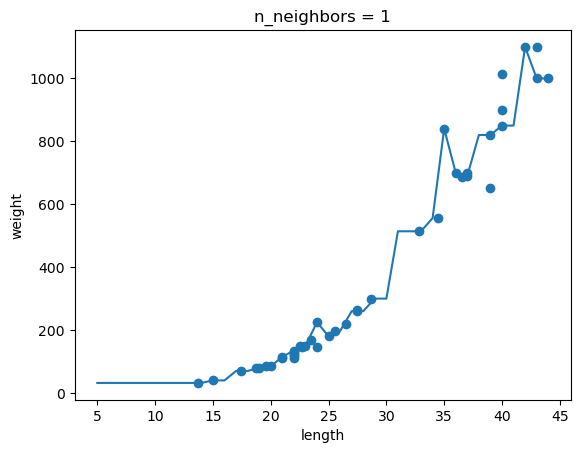

0.9698823289099254


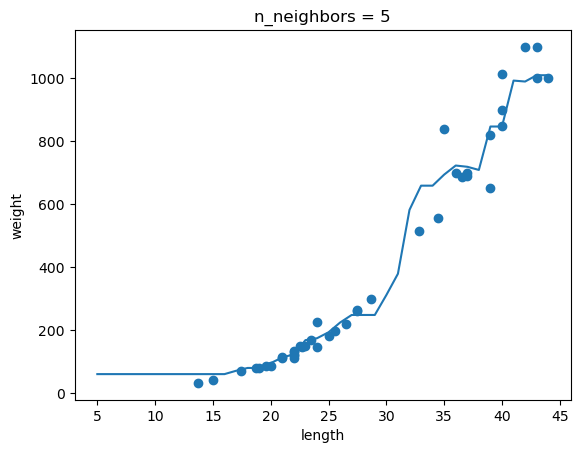

0.96164569026043


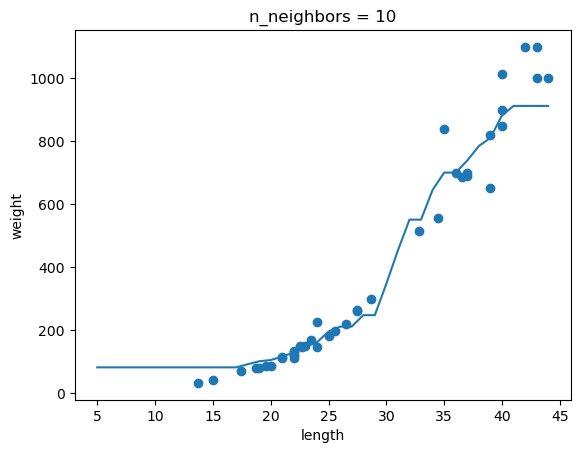

In [22]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
# n이 커질수록 예측 정확도가 내려간다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print(knr.score(train_input, train_target))
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()